# Sales Analysis

## Overview
### In this project, I will use Python to analyze the product sales in a period of 12 months. The analysis aims to answer the following questions: 

### Descriptive analysis
### 1. Which are the months with the highest sales? <br> 2. Which are the cities with the top sales? <br> 3. What products sold the most?

### Exploratory analysis
### 4. What time should we display advertisemens to maximize the likelihood of customer’s buying product? <br> 5. What products are most often sold together?

## 1. Import libraries & data 

In [101]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

### 1.1 Import & Merge 12 csv file

In [3]:
files = [file for file in os.listdir('./Sales Data')] #retrieve 12 files from Sales Data folder

year_data = pd.DataFrame() #create df named 'year data'

for file in files:
    df = pd.read_csv('./Sales Data/'+file) 
    year_data = pd.concat([year_data,df]) #use for loop to concat each month's data into year_data
    
year_data.to_csv('yeardata.csv',index=False) #create csv file

display(year_data)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### 1.2 Read merged file

In [4]:
year_data = pd.read_csv('year_data.csv')
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## 2. Data Cleaning

### 2.1 Drop NaN value

In [5]:
year_data = year_data.dropna()

### 2.2 Find and drop rows with 'Or' value 
Note: When transforming data type of 'Month' column into interger (task 2.5), I encountered the ValueError: invalid literal for int() with base 10: 'Or'. I used the same way to find the rows with 'Or' value and deleted them.

In [6]:
find_or = year_data[year_data['Order Date'].str[0:2] == 'Or']
display(find_or)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
year_data = year_data[year_data['Order Date'].str[0:2] != 'Or']

### 2.3 Transform data type
To facilitate future task (2.5.a), I transformed data type from string to integer.

In [8]:
year_data['Quantity Ordered'] = pd.to_numeric(year_data['Quantity Ordered']) #make integer
year_data['Price Each'] = pd.to_numeric(year_data['Price Each']) #make float

### 2.4 Augment data with additional column

#### a) Add month column

In [9]:
year_data['Month'] = year_data['Order Date'].str[0:2] #change Order Date value type to string; retrieve first 2 values

year_data['Month'] = year_data['Month'].astype('int32')

year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### b) Add sales column

In [10]:
year_data['Total Sales'] = year_data['Quantity Ordered'] * year_data['Price Each']
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### c) Add city column
To retrieve city, I extracted value between two commas

In [11]:
def get_city(address):
    return address.split(',')[1]

year_data['City'] = year_data['Purchase Address'].apply(lambda x: get_city(x))

year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


## 3 Data Visualization and Interpretation

## Question 1: Sales by Month

In [12]:
sales_by_month = year_data.groupby('Month').sum()['Total Sales']

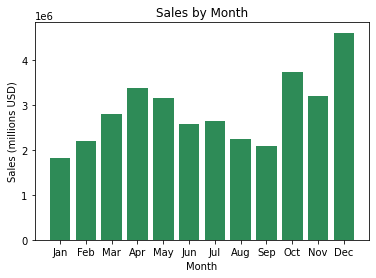

In [109]:
#Create bar chart
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.bar(month,sales_by_month,color='seagreen')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales (millions USD)')
plt.xticks(month)
plt.show()

### Analysis
### December is the month with the highest sales (approx. 4.6 millions). January has the lowest sales (approx. 1.8 millions)

## Question 2: Sales by Cities

In [14]:
sales_by_city = year_data.groupby('City').sum()['Total Sales']

sales_by_city

City
 Atlanta          2.795499e+06
 Austin           1.819582e+06
 Boston           3.661642e+06
 Dallas           2.767975e+06
 Los Angeles      5.452571e+06
 New York City    4.664317e+06
 Portland         2.320491e+06
 San Francisco    8.262204e+06
 Seattle          2.747755e+06
Name: Total Sales, dtype: float64

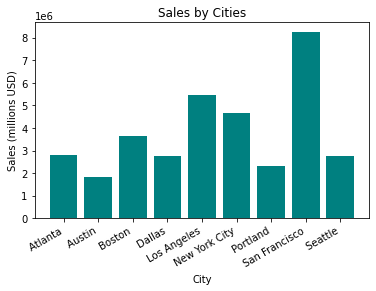

In [111]:
#Create bar chart
city = [city for city, df in year_data.groupby('City')]

plt.bar(city,sales_by_city,color='teal')
plt.title('Sales by Cities')
plt.xlabel('City')
plt.ylabel('Sales (millions USD)')
plt.xticks(city)

#avoid overlapping x-labels
plt.gcf().autofmt_xdate()
    
plt.show()

### Analysis
### San Francisco has the highest sales (approx. 8.25 millions). Austin has the lowest sales (approx. 1.8 millions).

## Question 3: Best-seller products

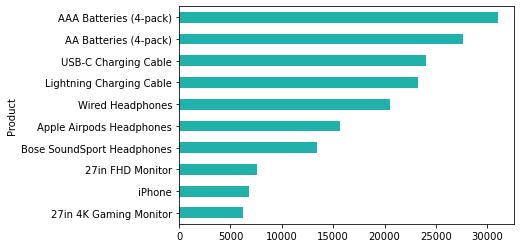

In [104]:
product = year_data.groupby('Product')

quantity = product.sum()['Quantity Ordered'] #total quantity ordered by product

top10 = quantity.nlargest(n=10).sort_values(ascending=True).plot(kind='barh',color='lightseagreen')
#plot horizontal barchart only the top10 best sold products

### Analysis: Best-seller product is AAA Batteries (4-pack) (approx. 31,000 products sold). 

## Question 4: Advertisement time for maximizing sales

In [16]:
year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


### We can see that the Order Date column contain string. I converted it into date time format for better use.

In [17]:
year_data['Order Date'] = pd.to_datetime(year_data['Order Date'])

year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [18]:
year_data['Hour'] = year_data['Order Date'].dt.hour #extract the hour from 'Order Date'
year_data['Minute'] = year_data['Order Date'].dt.minute #extract the minute

year_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


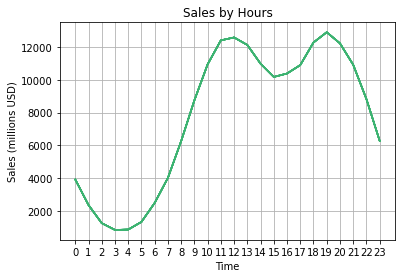

In [112]:
#Visualize data

hours = [hour for hour, df in year_data.groupby(['Hour'])]

plt.plot(hours,year_data.groupby(['Hour']).count(),color='mediumseagreen')
plt.title('Sales by Hours')
plt.xlabel('Time')
plt.ylabel('Sales (millions USD)')
plt.xticks(hours)
plt.grid()
    
plt.show()

### Analysis:
### Peak sales is 11am to 1pm (peak: 12pm) and 7pm. 

### Business Suggestion:
### Advertisement should be broadcasted from 11am to 1pm and 6pm to 7pm.

## Question 5: What products are most often sold together?

Note: If products have the same Order ID, it means they are bought together by one customer.

In [20]:
df = year_data[year_data['Order ID'].duplicated(keep=False)] #keep all duplicated values 

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) 
#join product with the same OrderID, seperated by comma

df = df[['Order ID','Grouped']].drop_duplicates() #drop duplicates by Order ID & Grouped

df.head(10)

<ipython-input-20-cb06c2154160>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


#### Import necessary libraries

In [21]:
from itertools import combinations
from collections import Counter

In [103]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2))) #count combination of 2 values
    
top_combination = pd.DataFrame(count.most_common(10))

top_combination.columns = ['Combination','Quantity']
top_combination.set_index(np.arange(1,11), inplace=True)

display(top_combination)

,Combination,Quantity
1,"(iPhone, Lightning Charging Cable)",1005
2,"(Google Phone, USB-C Charging Cable)",987
3,"(iPhone, Wired Headphones)",447
4,"(Google Phone, Wired Headphones)",414
5,"(Vareebadd Phone, USB-C Charging Cable)",361
6,"(iPhone, Apple Airpods Headphones)",360
7,"(Google Phone, Bose SoundSport Headphones)",220
8,"(USB-C Charging Cable, Wired Headphones)",160
9,"(Vareebadd Phone, Wired Headphones)",143
10,"(Lightning Charging Cable, Wired Headphones)",92


### Analysis:
### From here we can clearly see top 10 combinations of products bought by customers. The sales team could use this finding for their marketing strategy.